# Session – 1: Introduction to Random Variable Generation and Applications

## Tutorial-1

B) Suppose that 𝑋 follows exponential distribution with 
parameter 𝜆 = 2. Using the probability
    integral transform simulate 1000 random variables from the distribution of 𝑋. Draw the histogram
    of the simulated values and overlay the exact PDF. Add appropriate legends to the plot.


Exponential distribution(pdf):   
$
f(x) = \begin{cases}
λe^{-λx} & \text{if } x \geq 0, λ \geq 0 \\
0 & \text{otherwise}
\end{cases}
$   

  
Exponential distribution(cdf):  



consider,  
$
U \sim U(0,1)
$
Take the 1000 values following uniform distribution $ u_1, \ldots ,u_{1000} $   
we want to X such that $ X \sim f$
i.e we want to find $ x_1,\ldots,x_{1000} $ 

using probability integral transformation,  
we can write, $x_i = -\frac{1}{λ}\ ln(1 - u_i)$



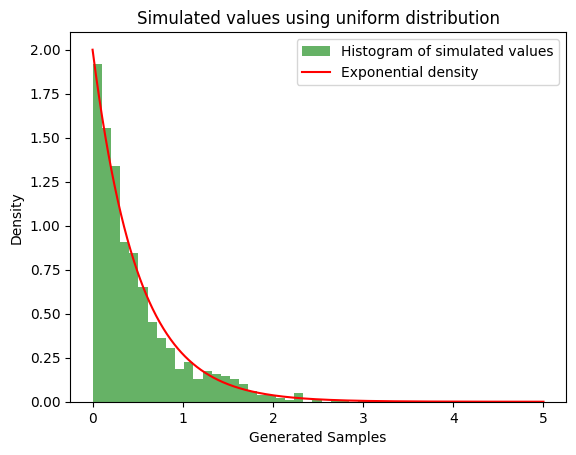

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability density function (PDF) for the exponential distribution
def f(x):
    if x >= 0:
        return 2 * (np.e ** (-2 * x))
    else:
        return 0

# Define the cumulative distribution function (CDF) for the exponential distribution
def F(x):
    if x >= 0:
        return 1 - np.e ** (-2 * x)
    else:
        return 0

# Number of samples to generate
n = 1000

# Generate uniform random numbers between 0 and 1
u = np.random.uniform(0, 1, n)

# Exponential distribution parameter (lambda)
λ = 2

# Apply the inverse transform sampling method to generate exponential random variables
x = (-1 / λ) * np.log(1 - u)

# Plot the histogram of the generated samples
plt.hist(x, density=True, bins=30, alpha=0.6, color='g', label='Histogram of simulated values')

# Define the range of x values for plotting the PDF
x_values = np.linspace(0, 5, 1000)

# Calculate the PDF values for the defined range of x
pdf_values = [f(x) for x in x_values]

# Plot the theoretical PDF of the exponential distribution
plt.plot(x_values, pdf_values, label='Exponential density', color='r')

# Add title and labels to the plot
plt.title("Simulated values using uniform distribution")
plt.xlabel("Generated Samples")
plt.ylabel("Density")

# Display the legend
plt.legend()

# Show the plot
plt.show()


D) Obtain the explicit forms of the CDF of the Logistic and Cauchy distributions. These two
distributions are well-suited to the transform method. For each of the following, verify the form
of the CDF and then generate 10,000 random variables using the Probability Integral Transform.
Compare your program (in terms of execution time) with the built-in Python functions available
in SciPy library, respectively. The PDF are given by:

Logistic PDF: $ f(x) = \frac{1}{\beta} \frac{e^{-\frac{x-\mu}{\beta}}}{\left(1+e^{-\frac{x-\mu}{\beta}}\right)^2}, -\infty < x < \infty, \mu \in \mathbb{R}, \beta>0 $

Cauchy PDF: $ f(x) = \frac{1}{\pi \sigma \left[1 + \left(\frac{x - \mu}{\sigma}\right)^2\right]}, -\infty < x < \infty, \mu \in \mathbb{R}, \sigma>0$

upon calculation we found,  

Logistic CDF: $ F(x) = \frac{1}{1 + e^{-\frac{x - \mu}{\beta}}}, -\infty < x < \infty, \mu \in \mathbb{R}, \beta>0$ 

Cauchy CDF: $F(x) = \frac{1}{\pi} \arctan\left(\frac{x - \mu}{\sigma}\right) + \frac{1}{2}, -\infty < x < \infty, \mu \in \mathbb{R}, \sigma>0$



In [5]:
# for logistic distribution
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
import time

# Record the start time for the custom logistic distribution generation
start_time = time.time()

# Define the probability density function (PDF) for the logistic distribution
def logistic_pdf(x, β=3, μ=0):
    return (1/β) * (np.e**(-(x-μ)/β) / (1 + np.e**(-(x-μ)/β))**2)

# Number of samples to generate
n = 10000

# Generate uniform random numbers between 0 and 1
u = np.random.uniform(0, 1, n)

# Parameters for the logistic distribution
β = 3
μ = 0

# Apply the inverse transform sampling method to generate logistic random variables
x = (-β) * np.log((1/u) - 1) + μ

# Record the end time for the custom logistic distribution generation
end_time = time.time()

# Record the start time for the inbuilt logistic distribution generation
start_time_inbuilt = time.time()

# Generate logistic random variables using the inbuilt numpy function
x_inbuilt = np.random.logistic(0, 1, n)

# Record the end time for the inbuilt logistic distribution generation
end_time_inbuilt = time.time()

# Calculate the elapsed time for both methods
elapsed_time = Decimal(end_time - start_time)
elapsed_time_inbuilt = Decimal(end_time_inbuilt - start_time_inbuilt)

# Print the elapsed times with precision up to 6 decimal places
print("Elapsed time (custom)      :", elapsed_time.quantize(Decimal('0.000000')), "seconds")
print("Elapsed time (inbuilt)     :", elapsed_time_inbuilt.quantize(Decimal('0.000000')), "seconds")


Elapsed time (custom)      : 0.000000 seconds
Elapsed time (inbuilt)     : 0.000000 seconds


In [6]:
# for cauchy distribution 
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
import time

# Record the start time for the custom Cauchy distribution generation
start_time = time.time()

# Define the probability density function (PDF) for the Cauchy distribution
def cauchy_pdf(x, σ=1, μ=0):
    return (1 / (np.pi * σ)) * (1 / (1 + ((x - μ) / σ) ** 2))

# Parameters for the Cauchy distribution
μ = 0
σ = 1
n = 10000

# Generate uniform random numbers between 0 and 1
u = np.random.uniform(0, 1, n)

# Apply the inverse transform sampling method to generate Cauchy random variables
y = σ * np.tan(np.pi * (u - 0.5)) + μ

# Record the end time for the custom Cauchy distribution generation
end_time = time.time()

# Record the start time for the inbuilt Cauchy distribution generation
start_time_inbuilt = time.time()

# Generate Cauchy random variables using the inbuilt numpy function
x_inbuilt = np.random.standard_cauchy(n)

# Record the end time for the inbuilt Cauchy distribution generation
end_time_inbuilt = time.time()

# Calculate the elapsed time for both methods
elapsed_time = Decimal(end_time - start_time)
elapsed_time_inbuilt = Decimal(end_time_inbuilt - start_time_inbuilt)

# Print the elapsed times with precision up to 6 decimal places
print("Elapsed time (custom)      :", elapsed_time.quantize(Decimal('0.000000')), "seconds")
print("Elapsed time (inbuilt)     :", elapsed_time_inbuilt.quantize(Decimal('0.000000')), "seconds")


Elapsed time (custom)      : 0.000000 seconds
Elapsed time (inbuilt)     : 0.000000 seconds


E) Let $𝑓(𝑥) = 𝛼𝑥^{−𝛼−1}$, 𝑥 ≥ 1 and 𝑓(𝑥) = 0, otherwise, where 𝛼 is a positive parameter. Show how
to generate random variables from this PDF from a uniform random number generator (Probability Integral Transform). Plot the PDF for different values of 𝛼 ∈ {1,5,10,15} in a single
plot window. Plot the CDF also corresponding to these PDFs in a single plot window.

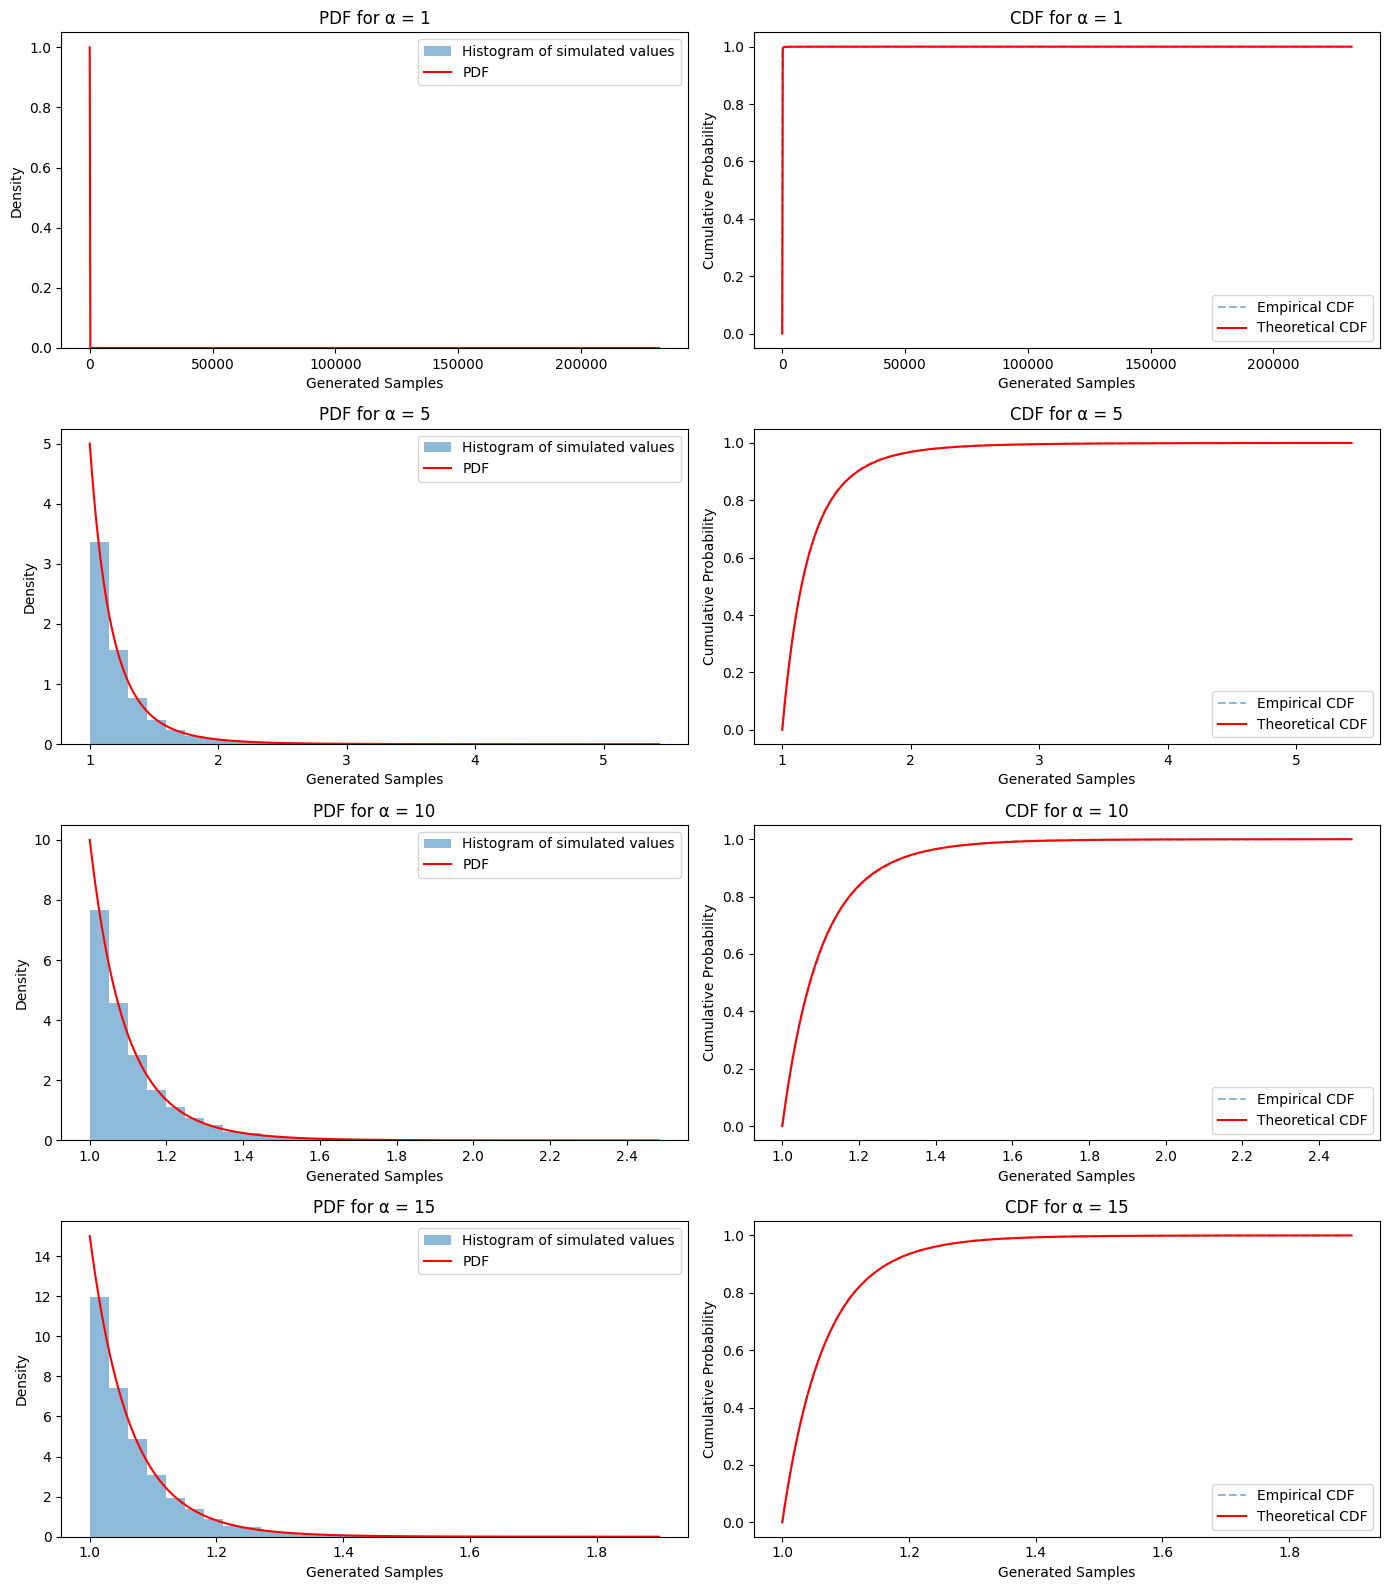

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PDF for the given distribution
def pdf(x, α):
    return np.where(x >= 1, α * x**(-α - 1), 0)

# Define the CDF for the given distribution
def cdf(x, α):
    return np.where(x >= 1, 1 - x**(-α), 0)

# Values of α to plot
alphas = [1, 5, 10, 15]

# Number of samples to generate
n = 10000

# Create figure
plt.figure(figsize=(14, 16))

# Generate and plot PDFs and CDFs for each α
for i, α in enumerate(alphas):
    u = np.random.uniform(0, 1, n)
    x = (1 / (1 - u))**(1 / α)

    # Plot the PDF
    plt.subplot(len(alphas), 2, 2*i + 1)
    plt.hist(x, density=True, bins=30, alpha=0.5, label='Histogram of simulated values')
    x_values = np.linspace(1, max(x), 1000)
    plt.plot(x_values, pdf(x_values, α), label='PDF', color='red')
    plt.title(f"PDF for α = {α}")
    plt.xlabel("Generated Samples")
    plt.ylabel("Density")
    plt.legend()

    # Plot the CDF
    plt.subplot(len(alphas), 2, 2*i + 2)
    x_sorted = np.sort(x)
    y_cdf = np.arange(1, n + 1) / n
    plt.plot(x_sorted, y_cdf, linestyle='--', alpha=0.5, label='Empirical CDF')
    plt.plot(x_values, cdf(x_values, α), label='Theoretical CDF', color='red')
    plt.title(f"CDF for α = {α}")
    plt.xlabel("Generated Samples")
    plt.ylabel("Cumulative Probability")
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


G) Find the constant 𝑎 so that the following function is a PDF of a random variable 𝑋. Then simulate
1000 random samples from the distribution of 𝑋 using probability integral transform. Draw the
histogram and overlay the exact PDF on it.

$$
f(x) = \begin{cases}
5x^{a} & \text{for } 0 < x < 1 \\
0 & \text{otherwise}
\end{cases}
$$


In [2]:
# solving the for a in this cell.

import sympy as sp

# Define symbolic variables
x, a = sp.symbols('x a')

# Define the function
f = sp.Piecewise((5 * x**a, (0 < x) & (x < 1)), (0, True))

# Ensure the integral equals 1
integral = sp.integrate(f, (x, 0, 1))

# Solve for 'a'
solutions = sp.solve(integral - 1, a)

# ofcourse you can do this by using pen paper 


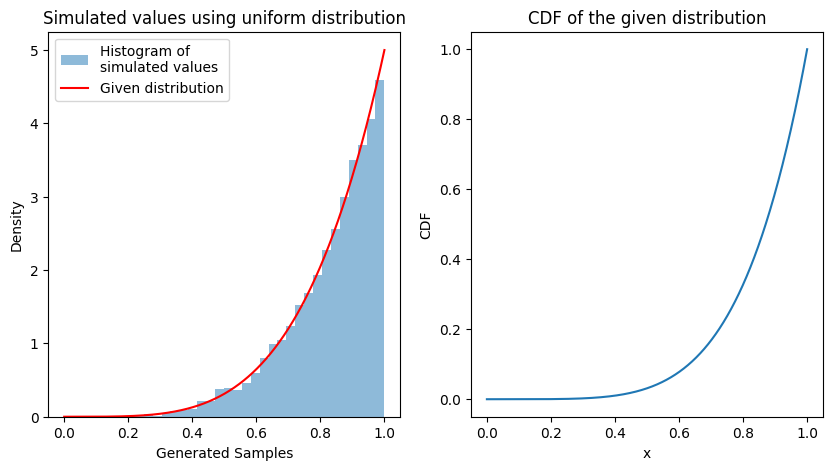

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assume solutions[0] contains the value of 'a' for the distribution
a = float(solutions[0])

# Define the probability density function (PDF)
def pdf(x):
    # Define the PDF function, which is 5*x^a within the range (0, 1), and 0 elsewhere
    return np.where((x > 0) & (x < 1), 5 * x**(a), 0)

# Define the cumulative distribution function (CDF)
def cdf(x):
    # Define the CDF function, which is (5/(a+1)) * x^(a+1) within the range (0, 1), and 0 elsewhere
    return np.where((x > 0) & (x < 1), (5/(a + 1)) * x**(a + 1), 0)

# Number of samples to generate
n = 10000

# Generate n random samples from a uniform distribution
u = np.random.uniform(0, 1, n)

# Transform the uniform samples using the inverse transform method to match the given distribution
x = u**(1/5)

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of simulated values and the given distribution PDF
plt.subplot(1, 2, 1)
plt.hist(x, density=True, label='Histogram of\nsimulated values', bins=30, alpha=0.5)
x_values = np.linspace(0, max(x), 1000)
plt.plot(x_values, pdf(x_values), label='Given distribution', color='red')
plt.title("Simulated values using uniform distribution")
plt.xlabel("Generated Samples")
plt.ylabel("Density")
plt.legend()

# Second subplot: Plot the cumulative distribution function (CDF)
plt.subplot(1, 2, 2)
plt.plot(x_values, cdf(x_values))
plt.title("CDF of the given distribution")
plt.xlabel("x")
plt.ylabel("CDF")

# Show the plot
plt.show()


H) Suppose that we are interested to simulate random samples from the distribution of 𝑋 following
beta(4,3). Your computer can simulate only Uniform(0,1) random variables. Write an algorithm
which will simulate 𝑋 from the Uniform(0,1) random variables. Develop the code in Python to
simulated 100 random variables from beta(4,3)

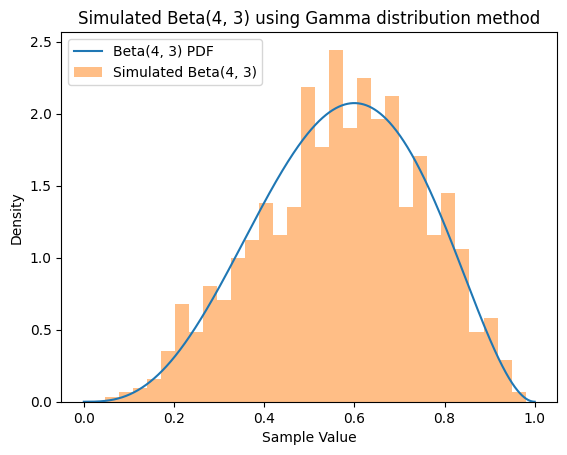

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Parameters of the Beta distribution
alpha = 4
beta = 3
m = 1000
Z = []

# Simulate the Beta distribution using Gamma-distributed random variables
for i in range(m):
    # Generate alpha random variables from uniform distribution
    u_alpha = np.random.uniform(0, 1, alpha)
    # Generate beta random variables from uniform distribution
    u_beta = np.random.uniform(0, 1, beta)
    
    # Calculate X as the sum of -log(1 - U) for alpha random variables
    X = np.sum(-np.log(1 - u_alpha))
    # Calculate Y as the sum of -log(1 - U) for beta random variables
    Y = np.sum(-np.log(1 - u_beta))
    
    # Calculate Z = X / (X + Y) and append to list
    Z.append(X / (X + Y))

# Generate x values for plotting the PDF
x_values = np.linspace(0, 1, 1000)

# Calculate the PDF of the Beta distribution using scipy.stats.beta.pdf
pdf_values = st.beta.pdf(x_values, alpha, beta)

# Plot the PDF of the Beta distribution
plt.plot(x_values, pdf_values, label='Beta({}, {}) PDF'.format(alpha, beta))

# Plot the histogram of simulated values of Z
plt.hist(Z, bins=30, density=True, alpha=0.5, label='Simulated Beta({}, {})'.format(alpha, beta))

plt.title('Simulated Beta({}, {}) using Gamma distribution method'.format(alpha, beta))
plt.xlabel('Sample Value')
plt.ylabel('Density')
plt.legend()
plt.show()


I) Starting from the Uniform(0,1), demonstrate how you can simulate random variables from the
gamma(𝑎, 𝑏) distribution, where 𝑎 and 𝑏 are positive integers. Write the program in Python which
takes the sample size (𝑛), the parameters 𝑎 and 𝑏 as user inputs and return the simulated values.
Simulate 1000 values from gamma(𝑎, 𝑏) using the above steps and draw histogram and overlay
the PDF. Give appropriate legends to the plot. Do this exercise for different choices of 𝑎 and 𝑏

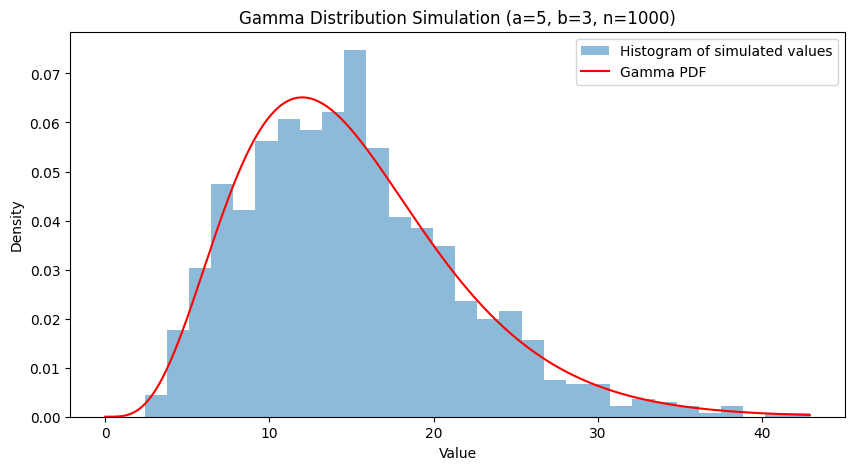

In [10]:
# it is define as a fucntion, we can address the above question
# for different values of a and b.

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Function to simulate random variables from Gamma(a, b) distribution
def simulate_gamma(a, b, n):
    x = []
    for i in range(n):
        u = np.random.uniform(0, 1, a)  # Generate 'a' uniform random variables
        y = np.sum(-b * np.log(1 - u))  # Sum of 'a' exponential random variables with rate '1/b'
        x.append(y)
    return np.array(x)

# User inputs for sample size, shape parameter (a), and scale parameter (b)
n = 1000  # Example sample size, you can use input() to take from user
a = 5  # Shape parameter
b = 3  # Scale parameter

# Simulate gamma-distributed random variables
x = simulate_gamma(a, b, n)

# Plotting
plt.figure(figsize=(10, 5))

# Plot the histogram of the simulated values
plt.hist(x, bins=30, density=True, alpha=0.5, label='Histogram of simulated values')

# Generate x values for plotting the PDF
x_values = np.linspace(0, np.max(x), 1000)

# Compute the PDF values
pdf_values = st.gamma.pdf(x_values, a, scale=b)

# Plot the PDF
plt.plot(x_values, pdf_values, label='Gamma PDF', color='red')

# Add titles and labels
plt.title(f'Gamma Distribution Simulation (a={a}, b={b}, n={n})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


J) Suppose that your computer can give you random variables from the 𝒩(3,1) distribution.
Suppose that we are interested to simulate 1000 random variables from the 𝜒10
2 (Chisquare
distribution with 10 degrees of freedom) and 𝑡10 (𝑡 distribution with 10 degrees of freedom).
Write the steps by which you execute the task starting from 𝒩(3,1) distributed random variables.
Write a program for it and draw histograms. Overlay the exact density function for verification.

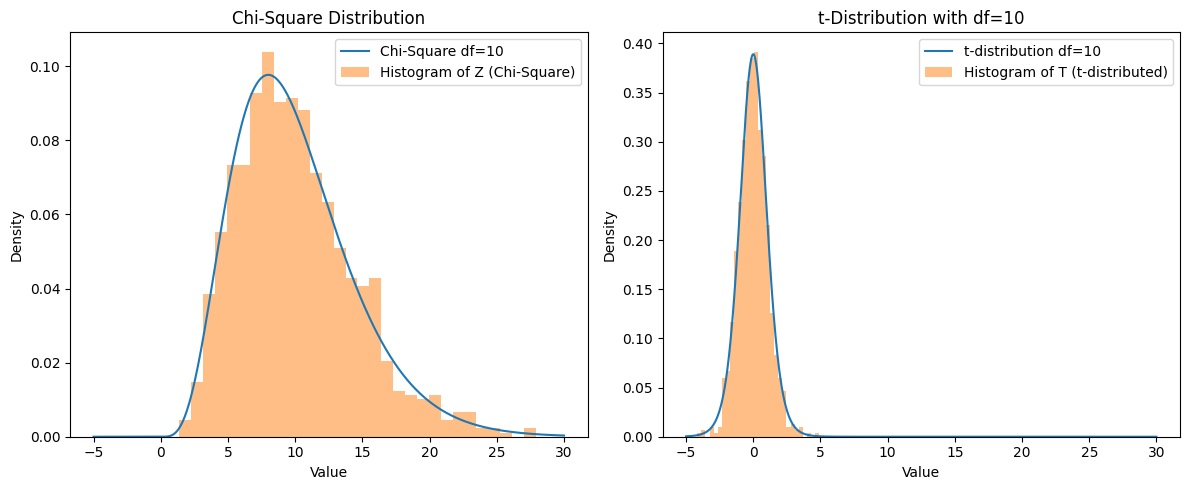

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Parameters
μ = 0
σ2 = 1
degree_of_freedom = 10
m = 1000

# Arrays to store results
Z = []
T = []

# Generate m samples
for i in range(m):
    # Generate a sample of size `degree_of_freedom` from N(μ, σ^2)
    n = np.random.normal(μ, np.sqrt(σ2), degree_of_freedom)
    
    # Compute the sum of squares for the chi-square distribution (Z)
    z = np.sum(n**2)
    Z.append(z)
    
    # Generate a sample of size `degree_of_freedom + 1` from N(μ, σ^2)
    n1 = np.random.normal(μ, np.sqrt(σ2), degree_of_freedom + 1)
    
    # Compute the t-distributed random variable (T)
    sample_mean = np.mean(n1)
    sample_variance = np.var(n1, ddof=1)  # ddof=1 for sample variance
    t = (sample_mean - μ) / (np.sqrt(sample_variance / (degree_of_freedom + 1)))
    T.append(t)

# Plotting
x_values = np.linspace(-5, 30, 1000)  # Range of x-values for plotting pdf

# Chi-square distribution (Z)
pdf_values_chi2 = st.chi2.pdf(x_values, degree_of_freedom)

# t-distribution (T)
pdf_values_t = st.t.pdf(x_values, degree_of_freedom)

# Create subplots for chi-square and t-distribution
plt.figure(figsize=(12, 5))

# Plot for chi-square distribution (Z)
plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values_chi2, label='Chi-Square df=10')
plt.hist(Z, bins=30, density=True, alpha=0.5, label='Histogram of Z (Chi-Square)')
plt.title('Chi-Square Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Plot for t-distribution (T)
plt.subplot(1, 2, 2)
plt.plot(x_values, pdf_values_t, label=f't-distribution df={degree_of_freedom}')
plt.hist(T, bins=30, density=True, alpha=0.5, label='Histogram of T (t-distributed)')
plt.title(f't-Distribution with df={degree_of_freedom}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


K) Suppose that you are interested in approximating the probability P(𝑋 > 𝑎), where 𝑎 is the last
two digits of your roll number and 𝑋 follows gamma(6, 3) distribution. Suppose that the following
barriers you have in the classroom: (i) Your computer gives only Uniform(0,1) random numbers
and (ii), the integration function is not available in the computer. Device a strategy to compute
the probability by using statistical simulation and give an estimate of the standard error of the
approximation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.integrate as intee
import math


α = 6
β = 3 
def f(x):
    return np.where((x>0), (np.e**(-x/β) * x**(α -1) ) / (β**α * math.gamma(α)),0)

exact_probability = 1 - intee.quad(f,0,4)[0]

m = 1000
generated_gamma_vals = []

for i in range(m):
    u = np.random.uniform(0, 1,α)
    y = np.sum(-(β)* np.log(1 - u))
    generated_gamma_vals.append(y)

count = np.sum(np.array(generated_gamma_vals) > 4)
estimated_probability = count / len(generated_gamma_vals)

# Output the results
print(f"Exact Probability (P(X > 4)): {exact_probability:.4f}")
print(f"Estimated Probability: {estimated_probability:.4f}")

std_error = np.sqrt((estimated_probability*(1-estimated_probability))/ len(generated_gamma_vals))
print(f"Estimated variance: {std_error**2:.10f}")   




Exact Probability (P(X > 4)): 0.9975
Estimated Probability: 0.9970
Estimated variance: 0.0000029910


L) Suppose 𝑋 follows 𝒩(0,1) distribution. Estimate the probability P(0 < 𝑋 < 1) by using statistical
simulation using 𝑀 = 106 samples from the 𝒩(0,1) distribution

In [4]:
import numpy as np
import scipy.integrate as intee
# defining the normal pdf using inbuild function, you can also use inbuilt
# pdf in scipy.stats

def normal_pdf(x, mu = 0, sigma= 1):
    # Calculate the normalization constant (1 / sqrt(2*pi*sigma^2))
    normalization = 1 / (np.sqrt(2 * np.pi * sigma**2))
    
    # Calculate the exponent term (-((x - mu)^2) / (2*sigma^2))
    exponent = -((x - mu)**2) / (2 * sigma**2)
    
    # Calculate the PDF value
    pdf_value = normalization * np.exp(exponent)
    
    return pdf_value
    
exact_probability = intee.quad(normal_pdf,0,1)[0]

n = np.random.normal(0,1,10**6)

count = np.sum((n>0) & (n<1))

estimated_probability = count/ len(n)

print(f"Exact Probability (P(0< X < 1)): {exact_probability:.4f}")
print(f"Estimated Probability: {estimated_probability:.4f}")

Exact Probability (P(0< X < 1)): 0.3413
Estimated Probability: 0.3415


## Handout-1

$a)$ Simulate 10000 random numbers from 𝑓(𝑥) using probability integral transform. The following
example considers the simulation from $𝑓(𝑥) = 3𝑥^2\  𝐼_{(0,1)}(𝑥)$.

$f(x) = \begin{cases}
3x^2 & \text{if } 0 < x < 1 \\
0 & \text{otherwise}
\end{cases}$

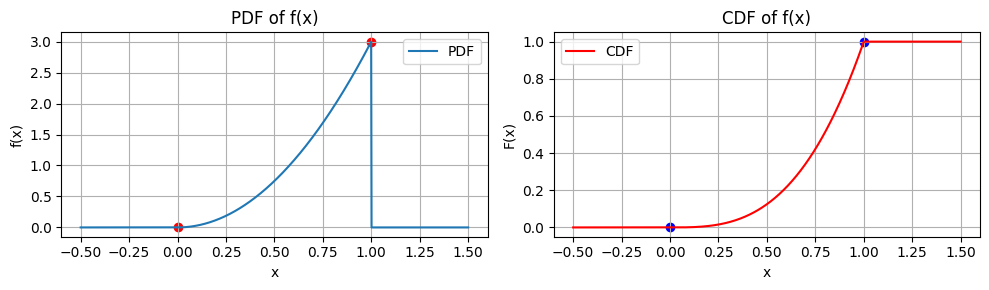

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

# Number of samples
n = 1000

# Generating n random uniform samples
u = np.random.uniform(0, 1, n)

# Define the PDF function
def f(x):
    return np.where((0 < x) & (x < 1), 3 * x**2, 0)

# Define the CDF function
def F(x):
    return np.where(x < 0, 0, np.where(x < 1, x**3, 1))

# Generate x values for plotting
x_values = np.linspace(-0.5, 1.5, 1000)

# Calculate PDF and CDF values for the x_values
pdf_values = f(x_values)
cdf_values = F(x_values)

# Create a figure with two subplots
plt.figure(figsize=(10, 3))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, label='PDF')
plt.scatter([0, 1], [0, 3], color='red')
plt.title("PDF of f(x)")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, color='red', label='CDF')
plt.scatter([0, 1], [0, 1], color='blue')
plt.title("CDF of f(x)")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


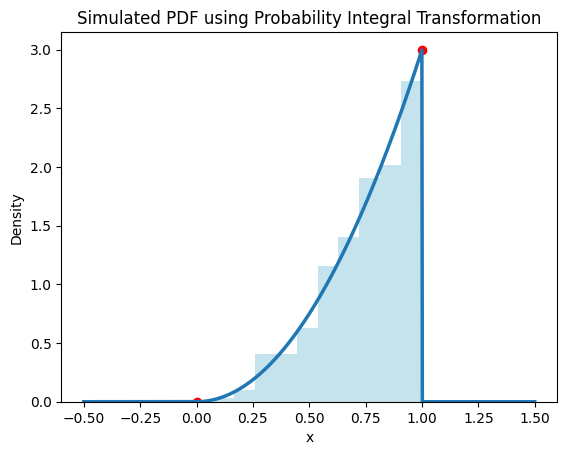

In [9]:
#usig probability integral transformation for simulating the pdf values for f(x)

x = [(u[i])**(1/3) for i in range(len(u))]
plt.hist(x,density =True, alpha= 0.7 ,color = 'lightblue')
plt.plot(x_values,pdf_values,linewidth = 2.5)
plt.scatter([0,1],[0,3],color ='red')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Simulated PDF using Probability Integral Transformation')
plt.show()

$b)$

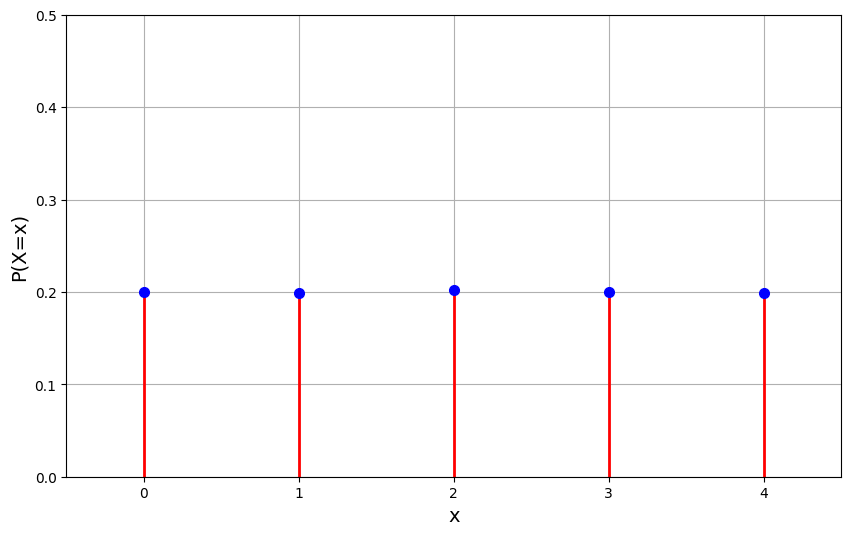

In [47]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

n = 5
M = 10**5
x = []


u = np.random.uniform(0, 1, M)
flr = np.floor(n * u)
x.extend(flr.tolist())  # x = x+ flr.tolist()

x.sort()

frequency = Counter(x)

# Extract only the frequency values and convert them to a list
frequency_list = list(frequency.values())


prob_vals = np.array(frequency_list) / M


# Create the plot
plt.figure(figsize=(10, 6))

# Plot vertical lines and points
for j in range(n):
    plt.vlines(j, ymin=0, ymax=prob_vals[j], colors='red', linewidth=2)
    plt.plot(j, prob_vals[j], 'bo', markersize=7)  # Plot the points

# Set the labels and limits
plt.xlabel('x', fontsize=14)
plt.ylabel('P(X=x)', fontsize=14)
plt.ylim(0,0.5)
plt.xlim(-0.5, n - 0.5)
# Show the plot
plt.grid(True)
plt.show()


$c$)

In [5]:
import numpy as np

# Parameters
p = 0.3  # Probability of success
n = 20   # Number of trials

# Generate n uniform random numbers between 0 and 1
u = np.random.uniform(0, 1, n)

# Create a boolean array where True indicates success (u <= p)
x = u <= p

# Print the results
print("Bernoulli trials (successes):\n",x)
print("Number of successes:", np.sum(x))


Bernoulli trials (successes):
 [ True False False False False  True False  True False False False  True
 False False False False False  True False False]
Number of successes: 5


$d)$

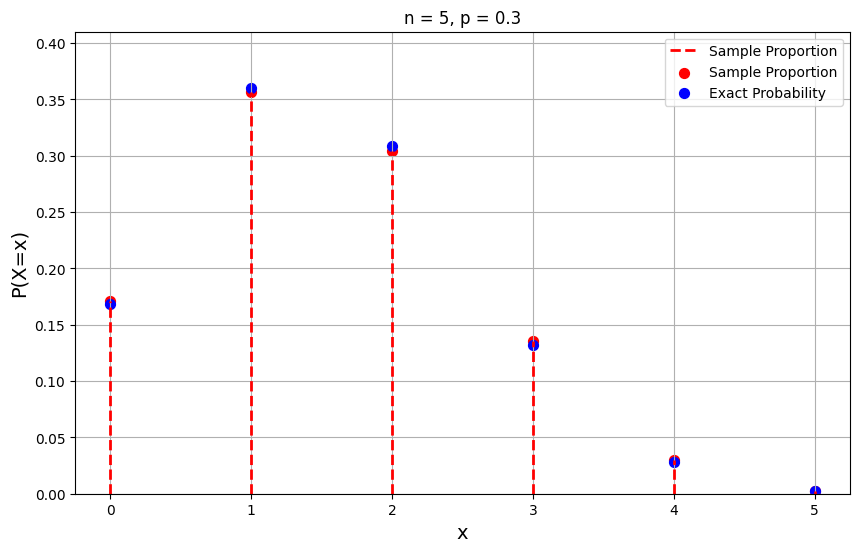

In [75]:
import numpy as np
from scipy.special import comb
from collections import Counter
import matplotlib.pyplot as plt

n = 5  # Number of trials
p = 0.3  # Success probability
x = np.arange(0, n+1)  # Support of Binomial(n, p)

# Calculate exact binomial probabilities
binom_prob = comb(n, x) * (p**x) * ((1-p)**(n-x))

M = 10**4  # Number of observations
obs = []

# Simulate observations from Binomial(n, p)
for _ in range(M):
    u = np.random.uniform(0, 1, n)
    obs.append(np.sum(u <= p))

# Calculate the sample proportions
frequency = Counter(obs)
approx_prob = np.array([frequency[i] for i in x]) / M #could be done in different ways as done before


# Create the plot
plt.figure(figsize=(10, 6))

# Plot sample proportions (approximate probabilities)
plt.vlines(x, ymin=0, ymax=approx_prob, colors='red', linestyle='dashed', linewidth=2, label='Sample Proportion')
plt.scatter(x, approx_prob, color='red', s=50, label='Sample Proportion')

# Plot exact binomial probabilities
plt.scatter(x, binom_prob, color='blue', s=50, label='Exact Probability')

# Add labels, title, and legend
plt.xlabel('x', fontsize=14)
plt.ylabel('P(X=x)', fontsize=14)
plt.ylim(0, max(max(approx_prob), max(binom_prob)) + 0.05)
plt.title(f'n = {n}, p = {p}')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.show()


$g)$ Simulation of random variables from a distribution using the transformation formula. In the
following, we simulate random variables from the Gamma(𝑛, 𝜆), where $ 𝜆 = \frac{1}{\beta}$ is the rate
parameter and n is the shape parameter.  

$u_1,\ldots,u_n \sim U(0,1)$ and $x_1,\ldots,x_n \sim exp(\beta)$

then using probability integral transformation,   
$x_i = -\beta\  ln(1-u_i)$

let $Y = \sum_{i=1}^n x_i$


The moment generating function M_Y(t) is given by:

$
M_Y(t) = E(e^{ty}) = E\left(e^{t\sum_{i=1}^n x_i}\right) = \prod_{i=1}^{n} E(e^{tx_i}) = \prod_{i=1}^{n} M_{X_i}(t) = (M_{X_1}(t))^n = \left(\frac{1}{1-\beta t}\right)^n \quad \text{with} \quad t < \frac{1}{\beta}
$

as MGF uniquely identify the distribution, 
From above calculation we conclude that Y follows gamma distribution with rate parameter $\beta$


                    

so we will do the simulation of gamma distribution  using uniform distribution.



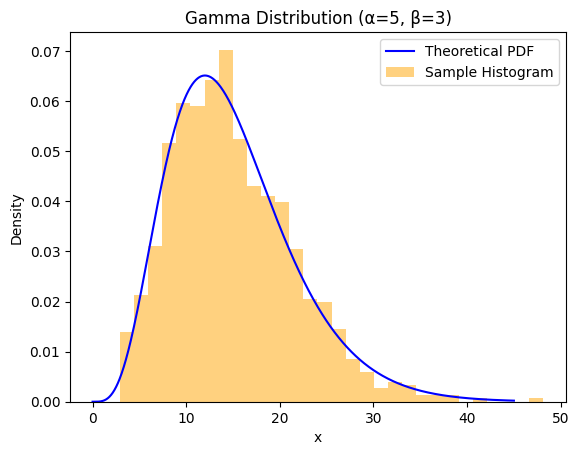

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Parameters for the gamma distribution
α = 5  # Shape parameter (alpha)
β = 3  # Scale parameter (beta)
m = 1000  # Number of samples to generate
x = []  # List to store generated samples

# Generate samples from the gamma distribution using the sum of exponential distribution method
for i in range(m):
    u = np.random.uniform(0, 1, α)  # Generate 'α' uniform random variables
    y = np.sum(-(β) * np.log(1 - u))  # Apply the transformation to get a gamma-distributed sample
    x.append(y)  # Append the generated sample to the list

# Generate x values for plotting the theoretical PDF
x_values = np.linspace(0, 45, 1000)

# Calculate the theoretical PDF values of the gamma distribution
pdf_values = st.gamma.pdf(x_values, α, scale=β)

# Plot the theoretical PDF
plt.plot(x_values, pdf_values, label='Theoretical PDF', color='blue')

# Plot the histogram of the generated samples to compare with the theoretical PDF
plt.hist(x, bins=30, density=True, alpha=0.5, label='Sample Histogram', color='orange')

# Add labels and legend for clarity
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Gamma Distribution (α=5, β=3)')
plt.legend()

# Display the plot
plt.show()


$h)$ Computing probabilities by simulation. In the following, we compute the probability $ P(X > 2) $, where $ X \sim \text{Exponential}(1) $, by simulating random variables from the underlying distribution. If $ \hat{p}_n $ is the estimate of $ p = P(X > 2) $, and $ \hat{p}_n = \frac{1}{n} \sum_{i=1}^{n} Y_i $ where $ Y_i = 1 $ if $ X_i > 2 $, else $ Y_i = 0 $. Therefore, $ E(Y_i) = p $. The estimated standard error of $ \hat{p}_n $ is $ \sqrt{\frac{\hat{p}_n (1-\hat{p}_n)}{n}} $. In the following code, we also compute the standard error associated with the estimate.


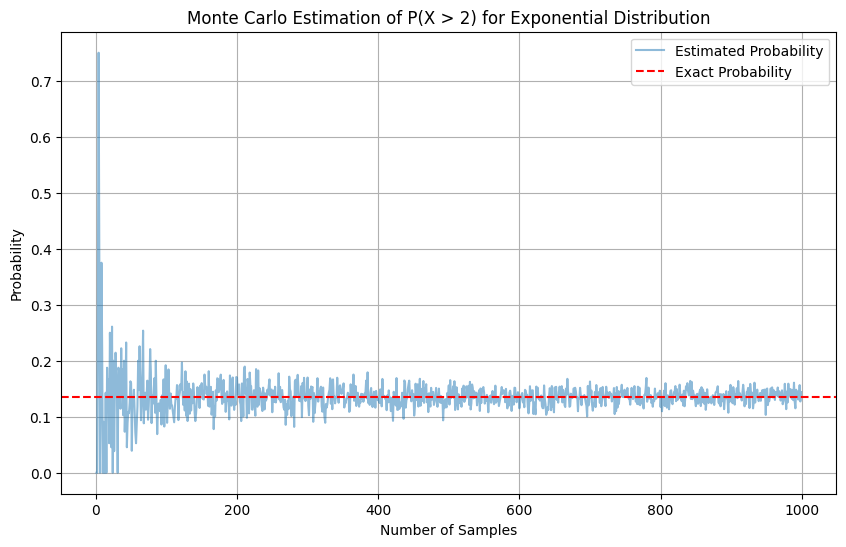

In [79]:
import numpy as np
import scipy.integrate as intee
import matplotlib.pyplot as plt

# Define the probability density function of the exponential distribution
def f(x):
    if x > 0:
        return np.exp(-x)
    else:
        return 0

# Calculate the exact probability using numerical integration
exact_probability = 1 - intee.quad(f, 0, 2)[0]

# Monte Carlo simulation to estimate the probability
M = []
m = 1000
for n in range(1, m):  # Note: Use 'n' to avoid overwriting 'i'
    u = np.random.uniform(0, 1, n)
    x = -np.log(1 - u)  # Generate exponentially distributed samples

    count = np.sum(x > 2)  # Count how many samples are greater than 2
    M.append(count)

# Calculate the estimated probabilities and standard errors
prob = np.array(M) / np.arange(1, m)
std_error = np.sqrt(prob * (1 - prob) / np.arange(1, m))

# Plot the estimated probabilities with the exact probability
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, m), prob, alpha=0.5, label='Estimated Probability')
plt.axhline(exact_probability, color='red', linestyle='--', label='Exact Probability')
plt.xlabel('Number of Samples')
plt.ylabel('Probability')
plt.title('Monte Carlo Estimation of P(X > 2) for Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()
